In [1]:
##########################
# 下面的代码用于准备运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot

# matplotlib 对中文的支持及保存为 pdf 格式
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = (8, 5)

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 二项分布


## 直观背景

我们进行 $n$ 次重复独立试验，每次试验的结果为 $A$ 或 $\bar{A}$，且 $P(A) = p$。

令 $X$ 表示 $A$ 出现的次数，则 $X = k$ (也就是 $A$ 出现 $k$ 次) 的概率为 ${n \choose k}(1-p)^{n-k}p^k$。

$X$ 的分布称为服从参数为 $n, p$ 的二项分布，记为 $b(n, p)$。

我们进行下列实验

- 随机生成一些服从二项的随机数，并观察其直方图
- 观察二项分布的分布列图形，感受图像形状和参数 n, p 的关系

在 python 中，多个包中都提供了处理随机变量的函数，这里我们用 `scipy.stats` 包中的 `binom` 对象生成一个二项分布随机变量。`binom` 对象是 `rv_discrete` 类的一个实例，它根据二项分布的定义实现了 `rv_discrete` 类中的抽象方法。

In [2]:
from scipy.stats import binom

def binomialRandoms(n, p, size):
    # 定义一个服从参数为 n, p 的二项分布的随机变量
    X = binom(n, p)
    
    print("随机生成 {} 个服从参数为 n={}, p={} 的二项分布的随机数：\n {}".format(size, n, p, X.rvs(size)))

In [32]:
binomialRandoms(20, 0.1, 30)

随机生成 30 个服从参数为 n=20, p=0.1 的二项分布的随机数：
 [3 2 5 4 0 3 3 2 2 1 2 0 2 5 2 4 2 3 0 0 0 3 4 3 1 0 2 2 2 2]


In [4]:
# 下面我们画一下二项分布随机数的直方图
from collections import Counter

def binomialBar(n, p, size):
    X = binom(n, p)
    
    # 统计频数
    frequency = Counter(X.rvs(size))
    x = []  # 所有可能的取值
    y = []  # 取各个值的频率
    for item in frequency.items():
        x.append(item[0])
        y.append(item[1]/size)
    
    fig = pyplot.figure()
    pyplot.bar(x, y)
    pyplot.title('二项分布随机数的直方图', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('频率', fontproperties=cn_font)
    pyplot.show()

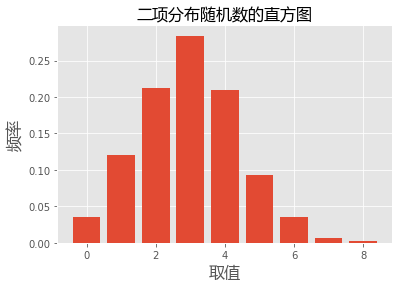

In [34]:
binomialBar(10, 0.3, 1000)

In [6]:
# 下面我们画二项分布的密度函数
def binomialPmf(n, p):
    X = binom(n, p)

    fig = pyplot.figure()
    x = range(n + 1)

    # 注意二项分布的密度函数可以写成 brv.pmf(x), 也可以写成 binom.pmf(x,n,p)
    pyplot.plot(x, X.pmf(x), 'bo', ms=8)
    pyplot.vlines(x, 0, X.pmf(x), colors='b', lw=5, alpha=0.5)

    # 画图范围
    pyplot.xlim(-1, n+1)
    pyplot.ylim(0, 0.4)

    pyplot.title('二项分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

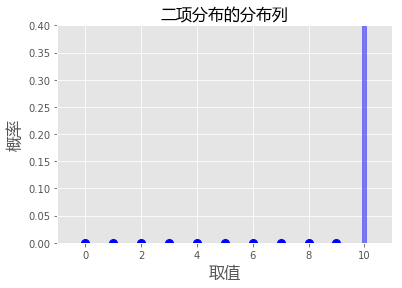

In [38]:
binomialPmf(10, 1)

下面我们考察 $X$ 的分布图像随参数 $p$ 的变化而变化的规律

In [8]:
# 在一张图中画多条密度曲线
def binomialPmfs(n, ps, colors):
    fig = pyplot.figure()    
    for p, c in zip(ps, colors):
        X = binom(n, p)
        x = range(n + 1)
        pyplot.plot(x, X.pmf(x), '.-', color=c, linewidth=0.5, label='$p=$'+str(p)) 
    
    # 画图范围   
    pyplot.legend(loc='best')
    pyplot.title('二项分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

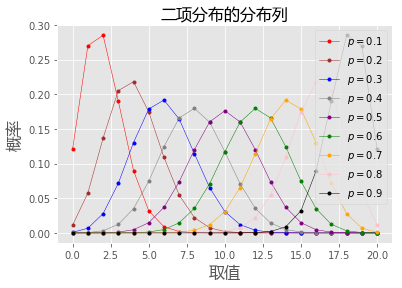

In [9]:
ps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = ['red', 'brown', 'blue', 'gray', 'purple', 'green', 'orange', 'pink', 'black']

binomialPmfs(20, ps, colors)

### 概率计算器

In [10]:
# 定义随机变量 X
X = binom(20, 0.9)

print(X.pmf(20))

0.12157665459056931


In [11]:
# 定义随机变量 X
X = binom(10, 0.01)

print(1 - X.pmf(0) - X.pmf(1))

0.004266200242831225


In [12]:
# 定义随机变量 X
X = binom(20, 0.01)

# 输出 X 取值为 k 的概率
print(X.pmf(0)+X.pmf(1))

0.9831406623643482


In [13]:
0.98314 ** 4

0.9342464679360962

In [14]:
Y = binom(80, 0.01)
print(Y.pmf(0)+Y.pmf(1)+Y.pmf(2)+Y.pmf(3))

0.9913408111071893


In [39]:
X = binom(10, 1/45)

print(X.pmf(4))

4.4751769887083514e-05


### 工厂供电问题

某工厂有 100 台同类型设备，各台设备的运行相互独立，每台设备的功率为 1 千瓦.~已知每台设备每天只有 60\% 的时间在运行，其它时间进行一些测量、调整、检修工作.

1. 如果因为当地供电紧张，供电部门只能提供 50 千瓦的电力给该工厂，问工厂能够正常生产的概率是多少？
2. 如果要保证工厂在一天 8 小时内最多不超过 1 分钟因电力不足而停工，供电部门应提供多少电力？

### 最可能发生的次数

一批产品中有 15% 的次品，现进行独立重复抽样检验，共抽取 20 个样品，问抽出的 20 个样品中最可能的次品数是多少? 并求其概率.

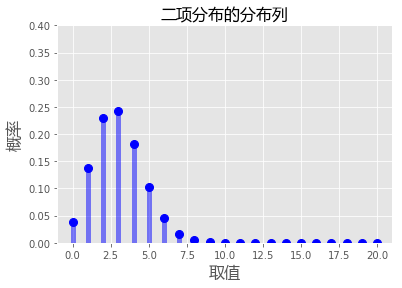

In [15]:
binomialPmf(20, 0.15)

# 泊松分布

## 直观背景

若事件 $A$ 在单位时间内平均发生 $\lambda$ 次，令 $X$ 表示单位时间内 $A$ 发生的次数，则 $X = k$ (也就是 $A$ 发生 $k$ 次) 的概率为 $\frac{\lambda^k}{k!}e^{-\lambda}$。

$X$ 的分布称为服从参数 $\lambda$ 的泊松分布，记为 $\pi(\lambda)$。

我们进行下列实验

- 随机生成一些服从泊松分布的随机数，并观察其直方图
- 观察泊松分布的分布列图形，感受图像形状和参数 $\lambda$ 的关系

这里我们用 `scipy.stats` 包中的 `poisson` 对象生成一个泊松分布随机变量。

In [16]:
from scipy.stats import poisson

def poissonRandoms(lamb, size):
    # 定义一个服从参数为 n, p 的二项分布的随机变量
    X = poisson(lamb)
    
    print("随机生成 {} 个服从参数为 lamb={} 的泊松分布的随机数：\n {}".format(size, lamb, X.rvs(size)))

In [17]:
poissonRandoms(3, 30)

随机生成 30 个服从参数为 lamb=3 的泊松分布的随机数：
 [5 8 2 3 4 2 3 3 7 3 2 2 1 3 4 4 6 4 2 3 3 1 4 3 5 5 1 4 2 3]


In [18]:
# 下面我们画一下泊松分布随机数的直方图
from collections import Counter

def poissonBar(lamb, size):
    X = poisson(lamb)
    
    # 统计频数
    frequency = Counter(X.rvs(size))
    x = []  # 所有出现的取值
    y = []  # 取各个值的频率
    for item in frequency.items():
        x.append(item[0])
        y.append(item[1]/size)
    
    fig = pyplot.figure()
    pyplot.bar(x, y)
    pyplot.title('泊松分布随机数的直方图', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('频率', fontproperties=cn_font)
    pyplot.show()

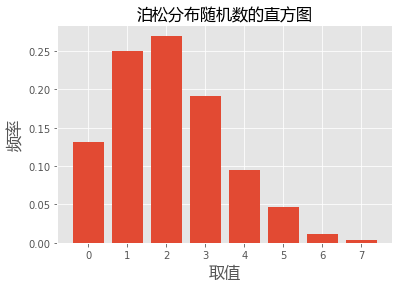

In [19]:
poissonBar(2, 1000)

In [20]:
# 下面我们画泊松分布的密度函数
def poissonPmf(lamb, x_max=10):
    X = poisson(lamb)

    fig = pyplot.figure()
    x = range(x_max)

    pyplot.plot(x, X.pmf(x), 'bo', ms=8)
    pyplot.vlines(x, 0, X.pmf(x), colors='b', lw=5, alpha=0.5)

    # 画图范围
    pyplot.xlim(-1, x_max+1)

    pyplot.title('泊松分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

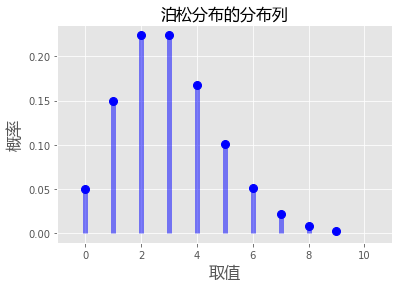

In [21]:
poissonPmf(3)

In [22]:
# 在一张图中画多条密度曲线
def poissonPmfs(lambs, colors, x_max=10):
    fig = pyplot.figure()
    x = range(x_max)
    
    for lamb, c in zip(lambs, colors):
        X = poisson(lamb)
        pyplot.plot(x, X.pmf(x), '.-', color=c, linewidth=0.5, label='$\lambda=$'+str(lamb)) 
    
    # 画图范围
    pyplot.xlim(-1, x_max+1)    
    pyplot.legend(loc='best')
    pyplot.title('泊松分布的分布列', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

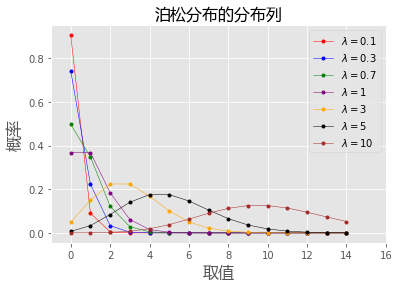

In [23]:
lambs = [0.1, 0.3, 0.7, 1, 3, 5, 10]
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'brown']

poissonPmfs(lambs, colors, x_max=15)

In [24]:
# 下面，我们比较一下二项分布和泊松分布
def possionApproxBinomial(n, p):
    X = binom(n, p)
    Y = poisson(n * p)

    fig = pyplot.figure()
    x = range(n+1)
    pyplot.plot(x, X.pmf(x), '.-', color='blue', linewidth=0.5, label='$(n,p)=$'+str((n,p)))
    pyplot.plot(x, Y.pmf(x), '*-', color='red', linewidth=0.5, label='$\lambda=$'+str(n*p)) 
    
    # 画图范围
    pyplot.xlim(-1, n+1)
    pyplot.legend(loc='best')
    pyplot.title('泊松分布近似二项分布', fontproperties=cn_font)
    pyplot.xlabel('取值', fontproperties=cn_font)
    pyplot.ylabel('概率', fontproperties=cn_font)
    pyplot.show()

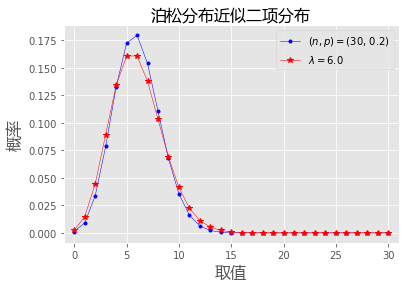

In [25]:
possionApproxBinomial(30, 0.2)

人们得到一个经验结论，当 $n$ 大于 30，$np$ 不超过 8 的时候，用泊松分布近似二项分布效果很好。

### 概率计算器

In [26]:
# 定义随机变量 X
X = poisson(1)

print(X.pmf(20))

1.51210135030121e-19


### 最可能发生的次数

一批产品中有 15% 的次品，现进行独立重复抽样检验，共抽取 20 个样品，问抽出的 20 个样品中最可能的次品数是多少? 并求其概率.

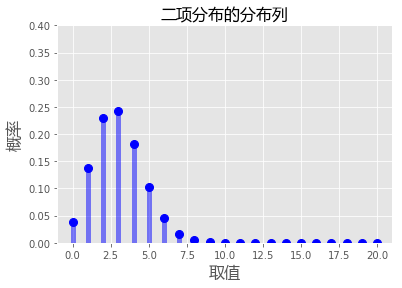

In [27]:
binomialPmf(20, 0.15)

# 习题分析

### 被马踢死的骑兵人数

有人统计过普鲁士军队的 14 个骑兵连队在连续 20 年 (1875 - 1894) 中被马踢死的人数，令 $X$ 表示一年一个骑兵连被马踢死的人数，统计情况如下表，验证 $X$ 服从泊松分布.
$$
\begin{array}{cccccc}
\hline
X & 0 & 1 & 2 & 3 & 4 \\
\hline
F & 109 & 65 & 22 & 3 & 1\\
\hline
\end{array}
$$

In [28]:
total = sum([109,65,22,3,1])
lamb = total / 20
print('20 被踢死的总人数为 {}'.format(total))
print('平均每年有 {} 人被马踢死'.format(lamb))

20 被踢死的总人数为 200
平均每年有 10.0 人被马踢死


In [29]:
X = poisson(10)
[X.pmf(k) for k in range(5)]

[4.5399929762484854e-05,
 0.0004539992976248486,
 0.0022699964881242435,
 0.007566654960414144,
 0.01891663740103538]

## 实验 1 赛制分析

甲乙比赛下棋，甲的水平较高，每局胜的概率为 0.55，假设各局比赛相互独立，对甲而言三局两胜、五局三胜、七局四胜，哪种赛制更加有利。

我们不妨分析在一般的 $2n+1$ 局 $n+1$ 胜赛制下甲获胜的概率是多少。

令 $X$ 表示 $2n+1$ 局中甲获胜的局数，则 $X \sim b(2n+1, 0.55)$。

In [30]:
def gameSystemAnalysis(n, p):
    """
    在甲每局获胜概率为 p 的情形下分析 2n+1 局 n+1 胜赛制下甲获胜的概率
    """
    pass
    


## 实验 2 机票超售问题

200 座的客机，每个乘客有 5% 的可能性不来，问超售多少机票合理?

假设超售 m 张机票，则上面的问题可以用 200 重独立伯努利试验模型描述，设要求登机乘客数为 $X$，则 $X \sim b(200+m, p)$。

方便起见，令 $Y$ 表示买票却未来的乘客数，则有 $X+Y=200+m$

有乘客上不了飞机的概率 $P(X > 200) = P(Y < m)$

下面，对超售的机票数 m 的每一个取值我们计算有乘客上不了机的概率